# Mutual Information (MI) for Utility Factor
Implemented Mutual Information as a metric for Utility Factor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from random import choices

In [2]:
# Compute Mutual Information (MI)

def calc_MI(X,Y,bins):
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]
    
    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)
    
    MI = H_X + H_Y - H_XY
    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

In [3]:
population = list(range(0, 101)) # Single Year of Age from 0 to 100 inclusive
weights = [11.6, 12.9, 12.7, 12.7, 13, 13, 12.9, 12.9, 12.7, 12.7,
           12.6, 12.1, 11.7, 11.5, 11.4, 11.4, 11.7, 11.9, 12.1, 12.6,
           12.9, 13.2, 13.7, 14.3, 14.6, 14.7, 15, 15.3, 15.1, 15,
           14.8, 15, 14.8, 14.8, 14.8, 14.3, 14, 13.4, 13, 12.8,
           12.7, 12.8, 12.8, 13.2, 13.4, 13.8, 13.8, 12.9, 12.6, 12.3,
           12, 12.1, 12.2, 12.8, 12.9, 12.9, 12.7, 12.3, 12, 11.9,
           11.6, 11.3, 10.9, 10.6, 10.5, 10.1, 10, 9.8, 9.5, 9.6,
           9.7, 8.3, 7.9, 7.5, 6.7, 6.5, 6, 5.7, 5.3, 5,
           4.8, 4.4, 4, 3.6, 3.4, 3.2, 3, 2.7, 2.4, 2.1,
           1.8, 1.5, 1.3, 1, 0.8, 0.6, 0.4, 0.3, 0.2, 0.1,
           0.2] # 3101.0 Australian Demographic Statistics (ERP Jun-2017)
age_samples = choices(population, weights, k=10**6) # generate k (1 million) samples

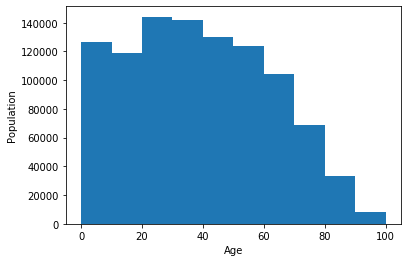

In [4]:
plt.hist(age_samples, bins=10)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

In [5]:
def calculate_utility(round_factor):
    # This function calculates the utility factor of the aggregated Age variable.
    # Aggregation is done by rounding age values to ranges of (round_factor) years.
    
    def myround(x, base=5):
        return base * round(x/base)

    age_rounded = [myround(x, round_factor) for x in age_samples]
    
    df = pd.DataFrame(
        {'sample': age_samples,
         'rounded': age_rounded
        })
    
    A = df[:1000].values
    
    bins = 100
    n = A.shape[1]
    matMI = np.zeros((n, n))
    
    for ix in np.arange(n):
        for jx in np.arange(n): #np.arange(ix+1,n):
            matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

    return matMI[0,1]

In [6]:
mylist=[]
for n in list(range(1, 21)):
    u = calculate_utility(n)
    print ("Base case vs aggregation to ", n, "-year groupings:", 'Utility Factor is %.5f' % u)
    mylist.append([n,u])

Base case vs aggregation to  1 -year groupings: Utility Factor is 6.38707
Base case vs aggregation to  2 -year groupings: Utility Factor is 5.22092
Base case vs aggregation to  3 -year groupings: Utility Factor is 4.84761
Base case vs aggregation to  4 -year groupings: Utility Factor is 4.42003
Base case vs aggregation to  5 -year groupings: Utility Factor is 4.12898
Base case vs aggregation to  6 -year groupings: Utility Factor is 3.87269
Base case vs aggregation to  7 -year groupings: Utility Factor is 3.66240
Base case vs aggregation to  8 -year groupings: Utility Factor is 3.48067
Base case vs aggregation to  9 -year groupings: Utility Factor is 3.33365
Base case vs aggregation to  10 -year groupings: Utility Factor is 3.19629
Base case vs aggregation to  11 -year groupings: Utility Factor is 3.05906
Base case vs aggregation to  12 -year groupings: Utility Factor is 2.94938
Base case vs aggregation to  13 -year groupings: Utility Factor is 2.83395
Base case vs aggregation to  14 -y

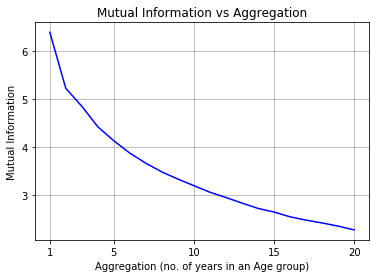

In [7]:
plt.plot([item[0] for item in mylist], [item[1] for item in mylist], color='b')
plt.xlabel('Aggregation (no. of years in an Age group)')
plt.ylabel('Mutual Information')
plt.title('Mutual Information vs Aggregation')
plt.xticks([1,5,10,15,20])
plt.grid(b=None, which='major', axis='both')
plt.show()